In [9]:
import pandas as pd
import plotly.graph_objs as go 
import plotly.offline as py 
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load datasets
df_classes = pd.read_csv("/Users/roy/Documents/UNI/3r/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")
df_edges = pd.read_csv("/Users/roy/Documents/UNI/3r/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv")
df_features = pd.read_csv("/Users/roy/Documents/UNI/3r/elliptic_bitcoin_dataset/elliptic_txs_features.csv", header=None)

In [5]:
df_features.head

<bound method NDFrame.head of               0    1         2         3         4          5         6    \
0       230425980    1 -0.171469 -0.184668 -1.201369  -0.121970 -0.043875   
1         5530458    1 -0.171484 -0.184668 -1.201369  -0.121970 -0.043875   
2       232022460    1 -0.172107 -0.184668 -1.201369  -0.121970 -0.043875   
3       232438397    1  0.163054  1.963790 -0.646376  12.409294 -0.063725   
4       230460314    1  1.011523 -0.081127 -1.201369   1.153668  0.333276   
...           ...  ...       ...       ...       ...        ...       ...   
203764  173077460   49 -0.145771 -0.163752  0.463609  -0.121970 -0.043875   
203765  158577750   49 -0.165920 -0.123607  1.018602  -0.121970 -0.043875   
203766  158375402   49 -0.172014 -0.078182  1.018602   0.028105 -0.043875   
203767  158654197   49 -0.172842 -0.176622  1.018602  -0.121970 -0.043875   
203768  157597225   49 -0.012037 -0.132276  0.463609  -0.121970 -0.043875   

             7          8         9    ...   

In [5]:
df_classes.head



<bound method NDFrame.head of              txId    class
0       230425980  unknown
1         5530458  unknown
2       232022460  unknown
3       232438397        2
4       230460314  unknown
...           ...      ...
203764  173077460  unknown
203765  158577750  unknown
203766  158375402        1
203767  158654197  unknown
203768  157597225  unknown

[203769 rows x 2 columns]>

In [6]:
len(df_edges),len(df_features),len(df_classes)

(234355, 203769, 203769)

In [7]:
display(df_edges.head(5),df_features.head(5),df_classes.head(5))

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [8]:
df_classes.groupby('class').size()

class
1            4545
2           42019
unknown    157205
dtype: int64

In [9]:
tx_features = ["tx_feat_"+str(i) for i in range(2,95)]
agg_features = ["agg_feat_"+str(i) for i in range(1,73)]
df_features.columns = ["txId","time_step"] + tx_features + agg_features
features = pd.merge(df_features,df_classes,left_on="txId",right_on="txId",how='left')
features['class'] = features['class'].apply(lambda x: '0' if x == "unknown" else x)

The x-axis of the stacked bar chart likely represents the different time steps (time_step) in the data, while the y-axis represents the count of occurrences of each class ('Unknown', 'Licit', 'Illicit') within each time step.

In [10]:
count_by_class = features[["time_step",'class']].groupby(['time_step','class']).size().to_frame().reset_index()
illicit_count = count_by_class[count_by_class['class'] == '1']
licit_count = count_by_class[count_by_class['class'] == '2']
unknown_count = count_by_class[count_by_class['class'] == "0"]

In [13]:
x_list = list(range(1,50))
fig = go.Figure(data = [
    go.Bar(name="Unknown",x=x_list,y=unknown_count[0],marker = dict(color = 'rgba(120, 100, 180, 0.6)',
        line = dict(
            color = 'rgba(120, 100, 180, 1.0)',width=1))),
    go.Bar(name="Licit",x=x_list,y=licit_count[0],marker = dict(color = 'rgba(246, 78, 139, 0.6)',
        line = dict(
            color = 'rgba(246, 78, 139, 1.0)',width=1))),
    go.Bar(name="Illicit",x=x_list,y=illicit_count[0],marker = dict(color = 'rgba(58, 190, 120, 0.6)',
        line = dict(
            color = 'rgba(58, 190, 120, 1.0)',width=1)))

])
fig.update_layout(barmode='stack')
py.iplot(fig)

## Generating samples from feature distributions

In [11]:
# Merge df_features and df_classes on their indices if they have the same index
merged_df = pd.merge(df_features, df_classes, left_index=True, right_index=True)

# Filter the rows with class 'unknown'
unknown_df = merged_df[merged_df['class'] == 'unknown']
known_df = merged_df[merged_df['class'] != 'unknown']

In [ ]:
from scipy import stats

mean, std = stats.norm.fit(df['feature_name'])

new_samples = np.random.normal(loc=mean, scale=std, size=100)

plt.figure(figsize=(12, 6))
sns.histplot(df['feature_name'], kde=True, color='blue', label='Original Data')
sns.histplot(new_samples, kde=True, color='red', label='Sampled Data', alpha=0.5)
plt.legend()
plt.title('Comparison of Distributions')
plt.show()

In [14]:
unknown_df = unknown_df.drop(columns=['class'])
known_df = known_df.drop(columns=['class'])


In [5]:


# Assuming df is your DataFrame containing all the features

# Create a new DataFrame to store the generated samples for each feature
generated_samples_df = pd.DataFrame()

# Iterate over each feature
for column in unknown_df.columns:
    # Fit a normal distribution to the feature
    mean, std = stats.norm.fit(unknown_df[column])
    
    # Generate new samples based on the fitted distribution
    new_samples = np.random.normal(loc=mean, scale=std, size=200000)
    
    # Store the generated samples in the new DataFrame
    generated_samples_df[column] = new_samples

    # Plot the comparison of distributions for each feature
    #plt.figure(figsize=(12, 6))
    #sns.histplot(df_features[column], kde=True, color='blue', label='Original Data')
    #sns.histplot(new_samples, kde=True, color='red', label='Sampled Data', alpha=0.5)
    #plt.legend()
    #plt.title(f'Comparison of Distributions for {column}')
    #plt.show()

# Display the new DataFrame containing the generated samples for each feature
#print(generated_samples_df.head())


In [6]:
generated_samples_df

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,txId
0,2.095166e+08,21.319806,0.098368,-1.141105,0.784997,0.412005,-0.473970,0.898033,0.192797,-0.764598,...,-0.399732,3.654261,-1.080526,-0.843370,-0.818326,0.467023,-0.701195,1.277556,-0.431282,-1.390887e+07
1,5.273241e+07,13.435611,2.523193,-0.912169,-0.822269,0.131225,1.293170,-0.280649,0.781211,-0.471259,...,-0.990405,0.433692,0.261041,0.280856,0.347106,0.992309,-0.374319,0.738452,1.838491,-1.884765e+07
2,2.469610e+08,13.461719,-0.944553,-0.897397,-0.960114,0.785165,-0.001033,-0.275545,0.090804,1.797431,...,0.634091,-0.862117,0.122708,-0.492397,0.541418,0.589350,-2.153016,0.317344,-0.661764,9.042256e+07
3,2.091541e+08,9.493924,0.030648,1.110619,0.667115,0.525806,0.658723,-0.332623,-1.059899,0.209956,...,-0.947459,0.067039,0.118592,-0.517267,1.071379,-0.207915,-0.781270,0.751871,-1.679944,2.325777e+08
4,1.746383e+08,21.001382,0.078330,-1.007225,-0.973947,-0.216082,-0.192862,0.041539,-0.650344,0.666951,...,0.184029,2.021281,-0.976063,0.672646,0.695237,0.162887,0.878977,-0.428093,1.365525,7.505525e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,7.048773e+07,35.955494,0.486220,-0.786548,-1.104078,0.121515,-1.767920,1.484277,1.982769,-1.591384,...,-0.172256,-1.487172,-1.840130,-0.418459,0.940266,-0.994164,0.130941,-0.529736,0.386472,2.651664e+08
199996,2.401784e+08,40.040768,-1.922158,0.483242,-1.508054,-0.448302,-0.184524,0.167543,0.469485,-0.130391,...,0.691952,0.457246,0.594257,0.548396,1.007970,-0.641616,-0.923213,-1.030502,-0.662352,2.835053e+08
199997,2.512465e+08,7.955170,0.217049,1.445208,1.068984,0.819005,-0.379182,-0.539615,-1.198225,2.152573,...,-1.209215,0.955053,0.462468,-0.312641,-0.987297,-0.665560,1.231099,0.541540,0.264655,2.366681e+08
199998,5.513256e+07,15.350277,-3.384141,-0.068675,1.136386,-0.073517,0.175032,0.227778,-1.836151,1.455900,...,0.081578,0.934696,0.033857,-1.056044,1.292561,1.266720,-0.652054,0.927233,1.065827,4.459925e+07


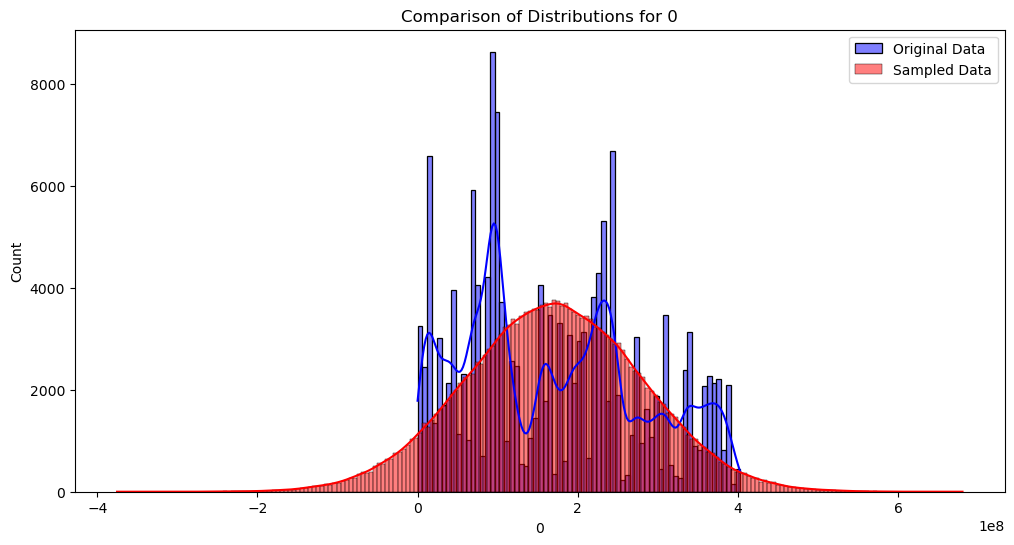

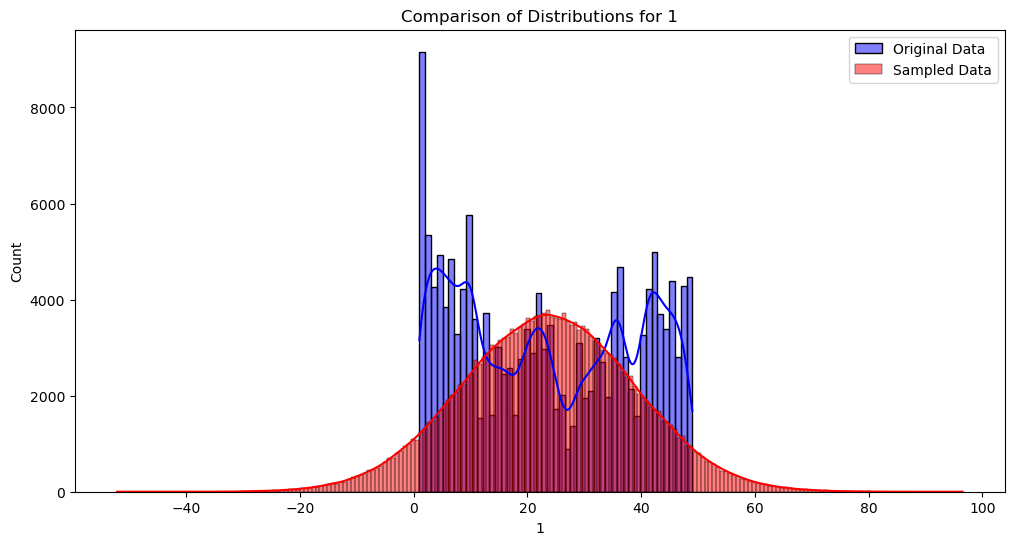

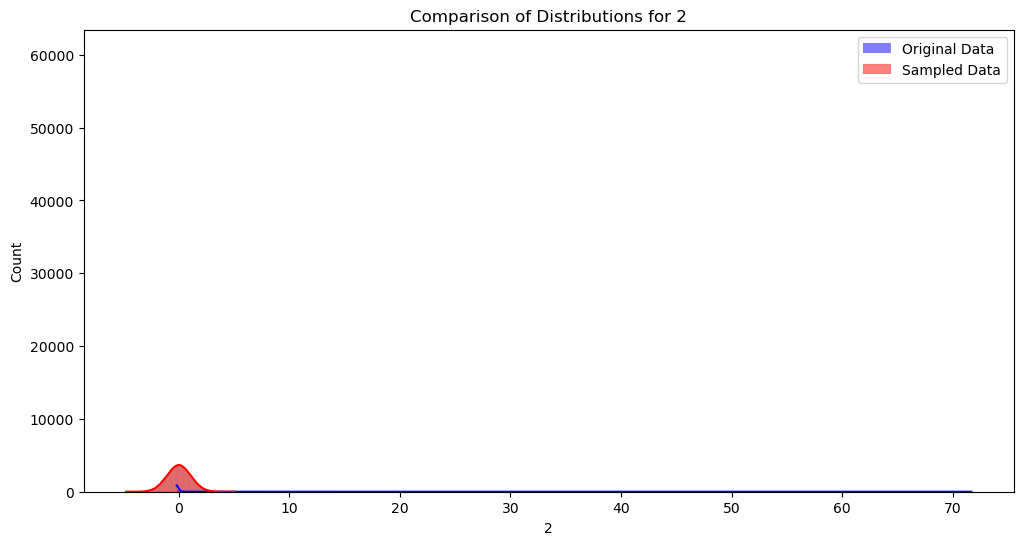

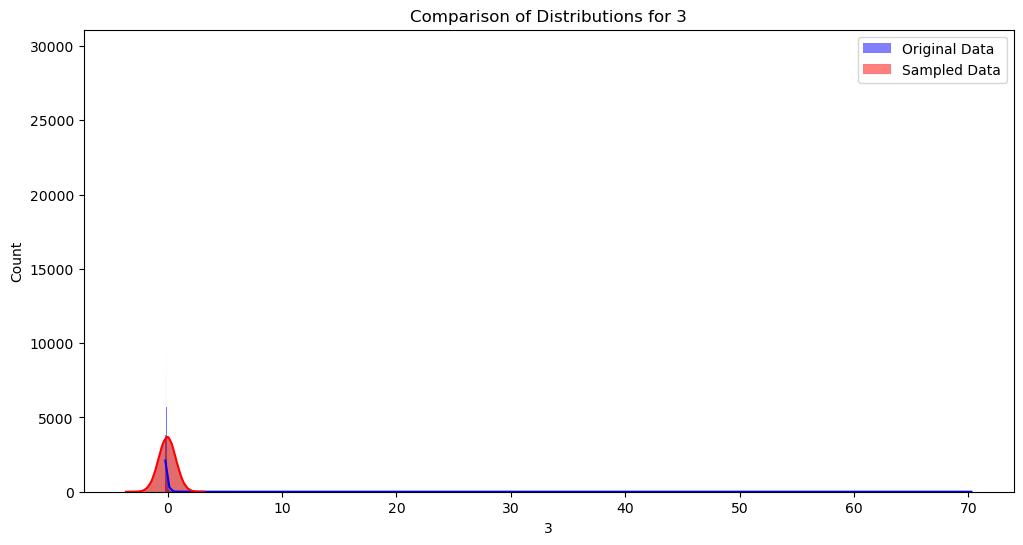

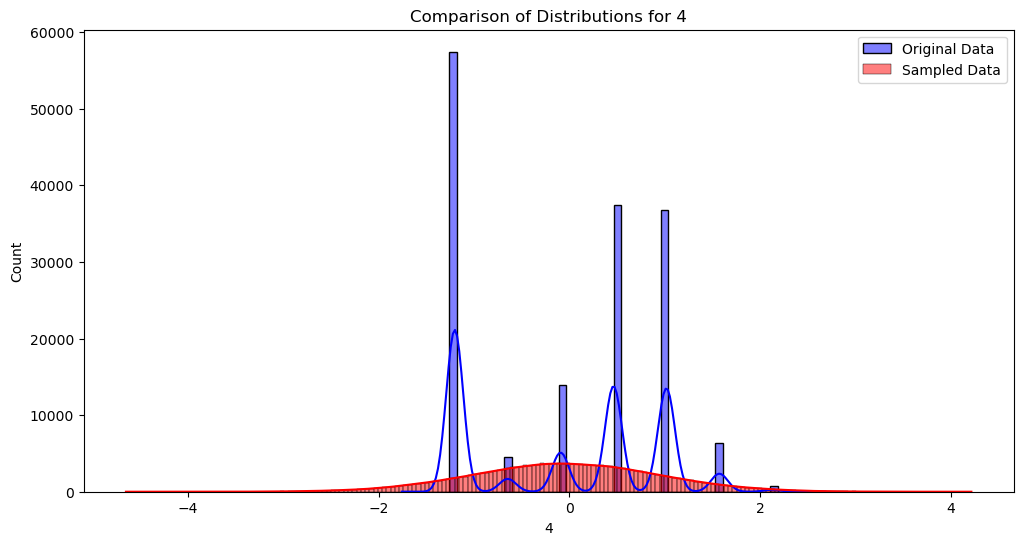

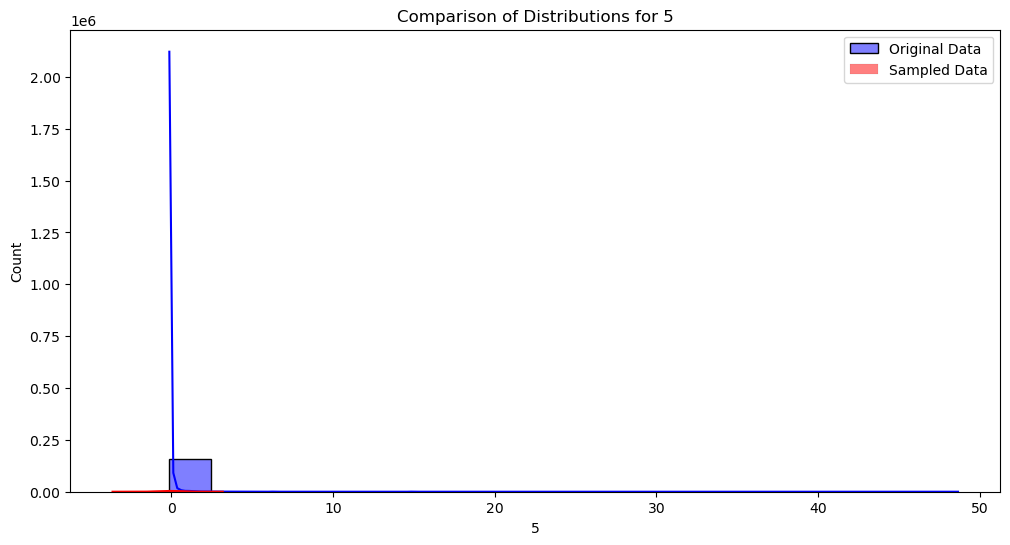

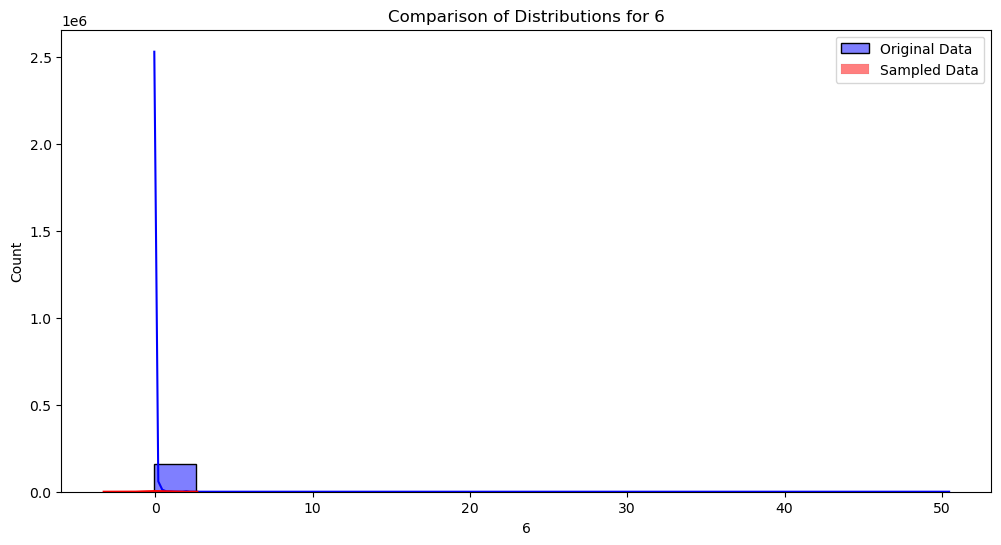

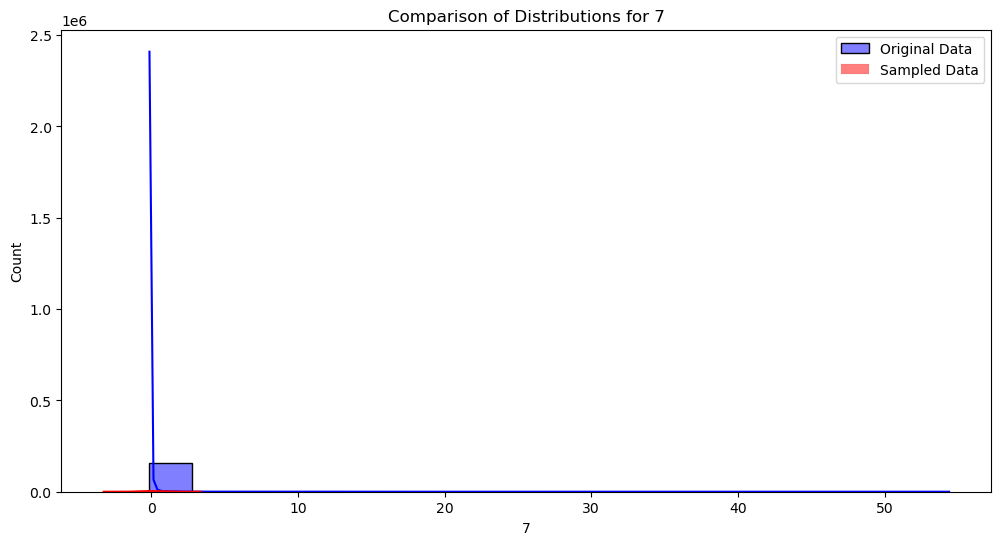

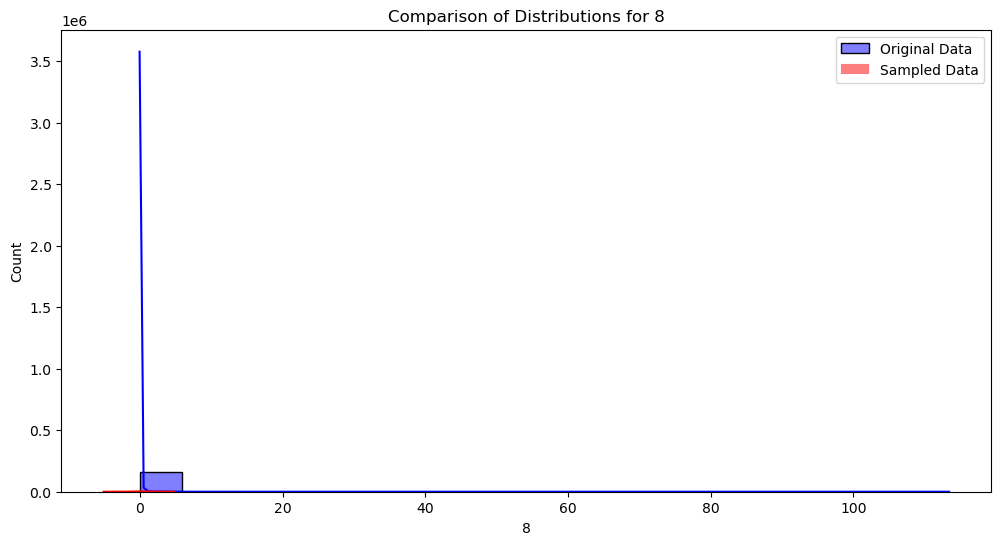

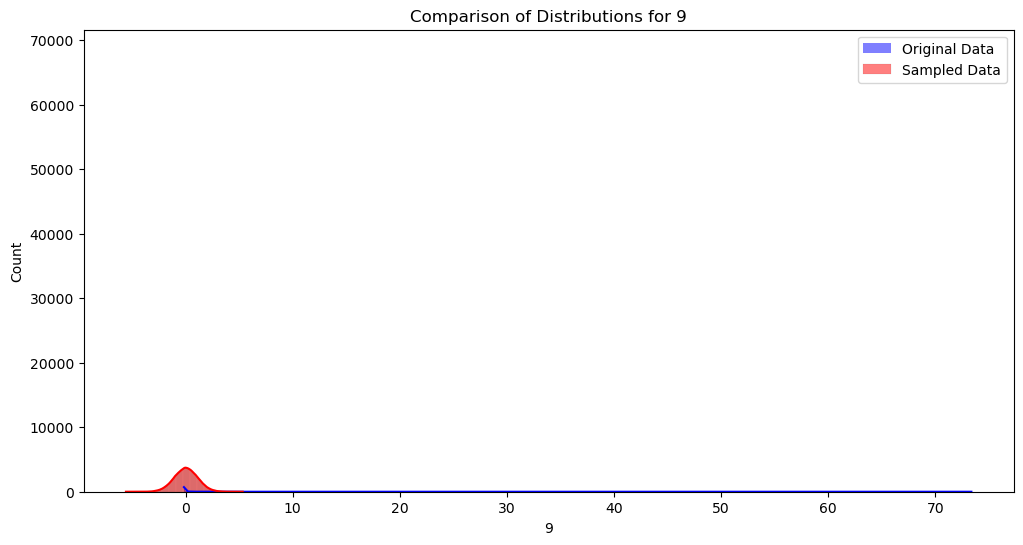

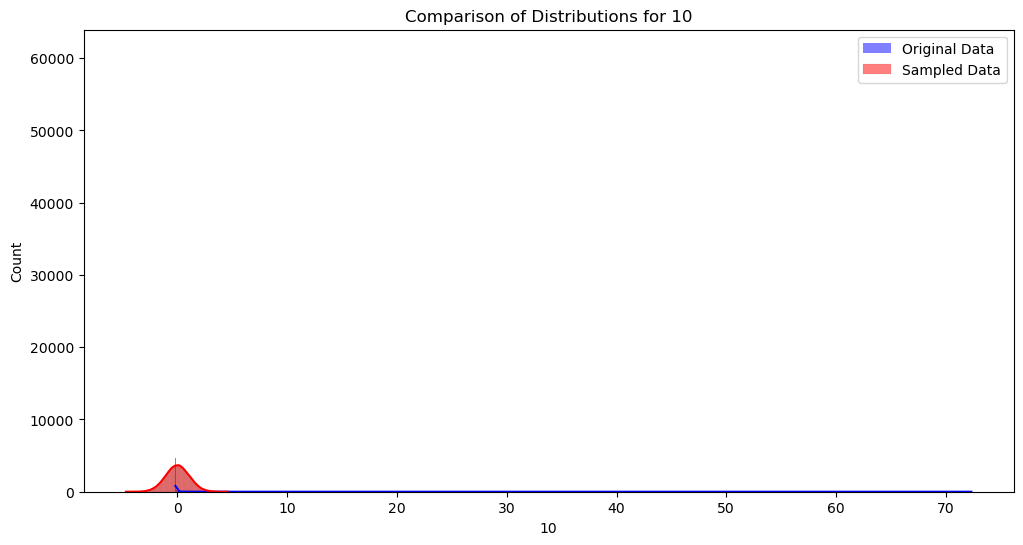

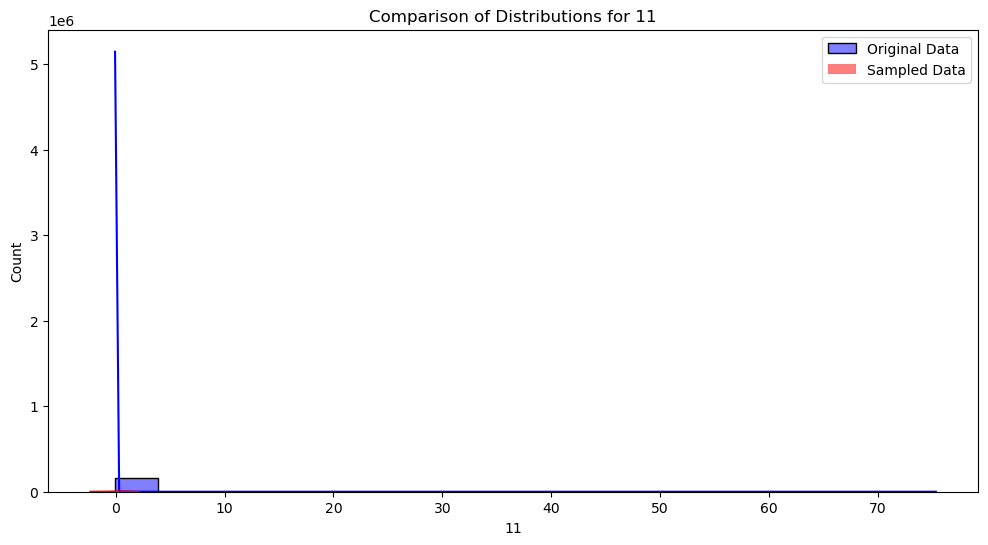

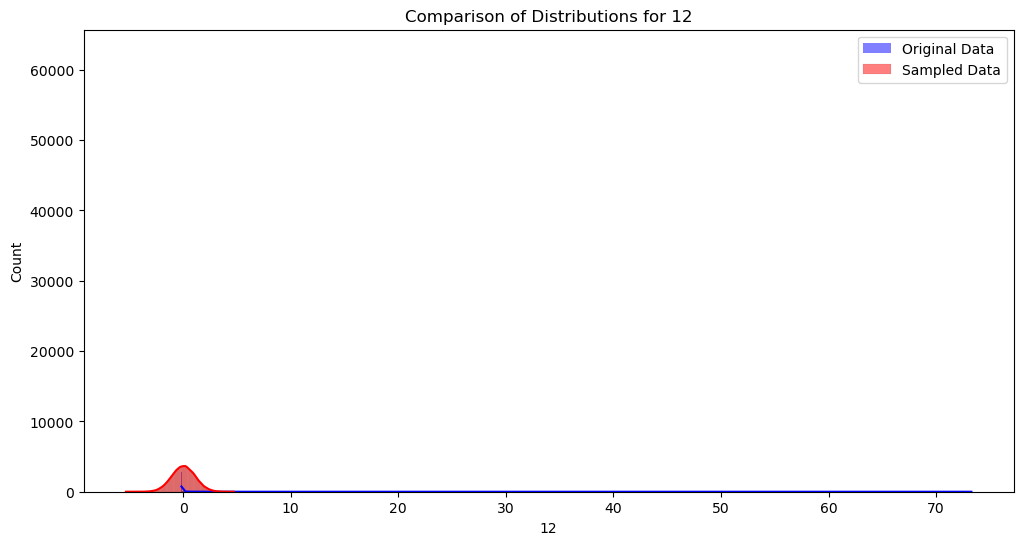

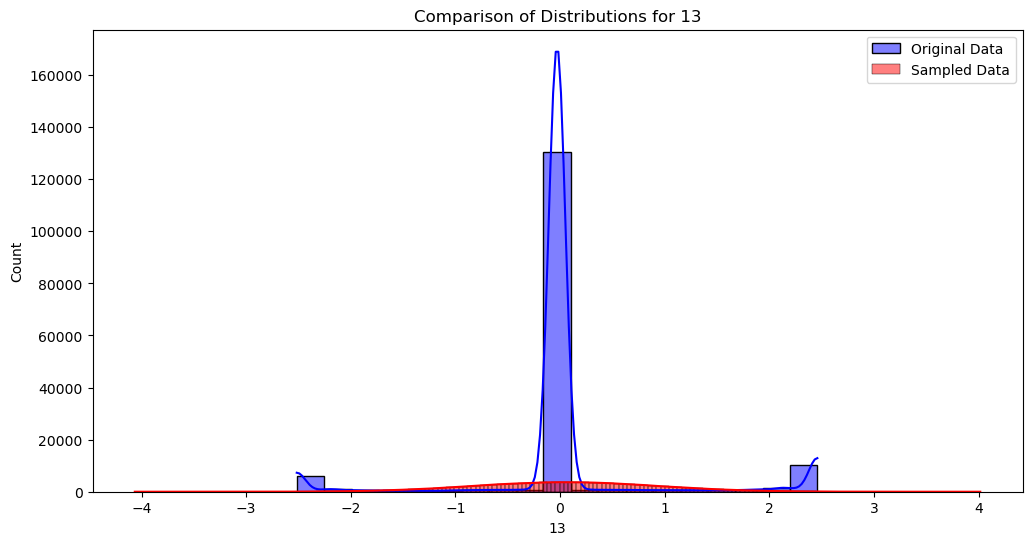

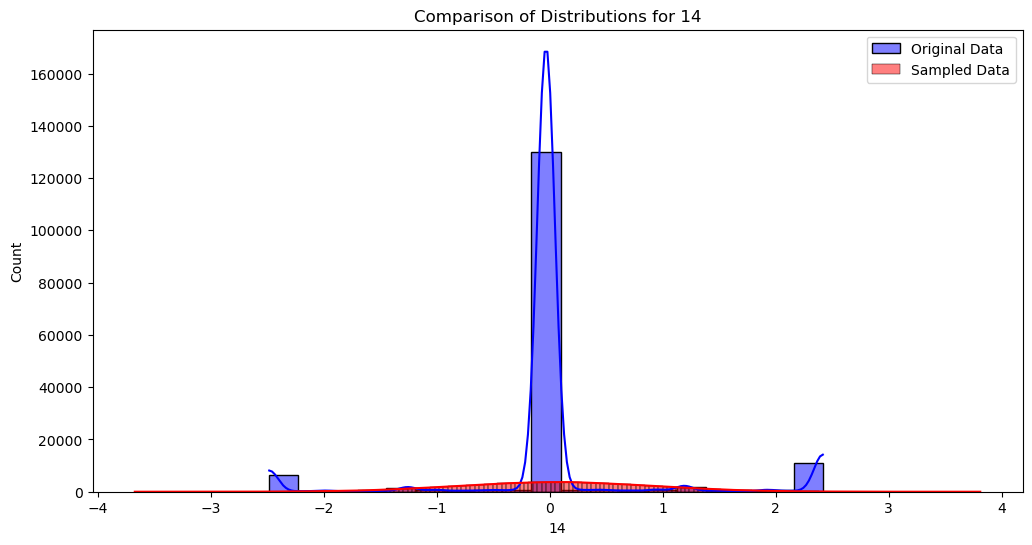

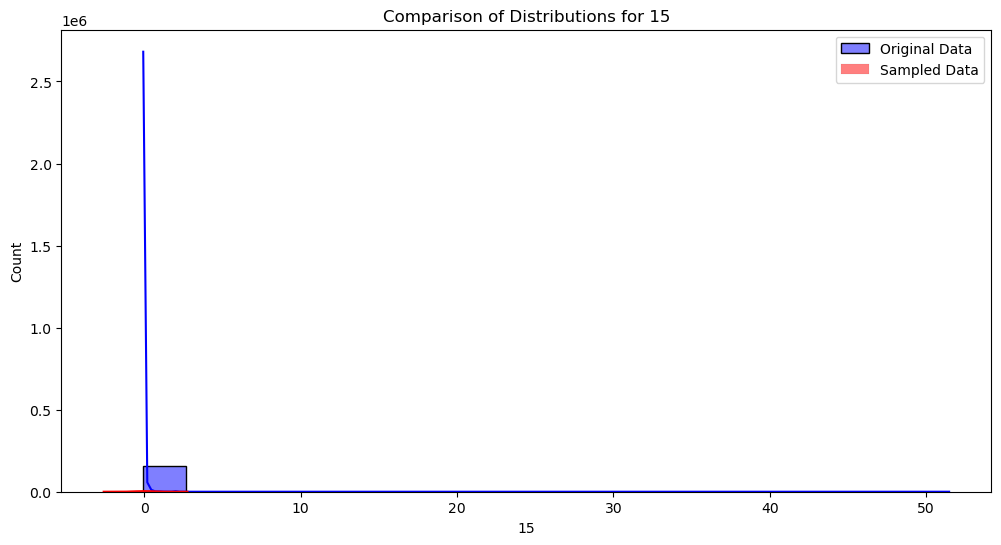

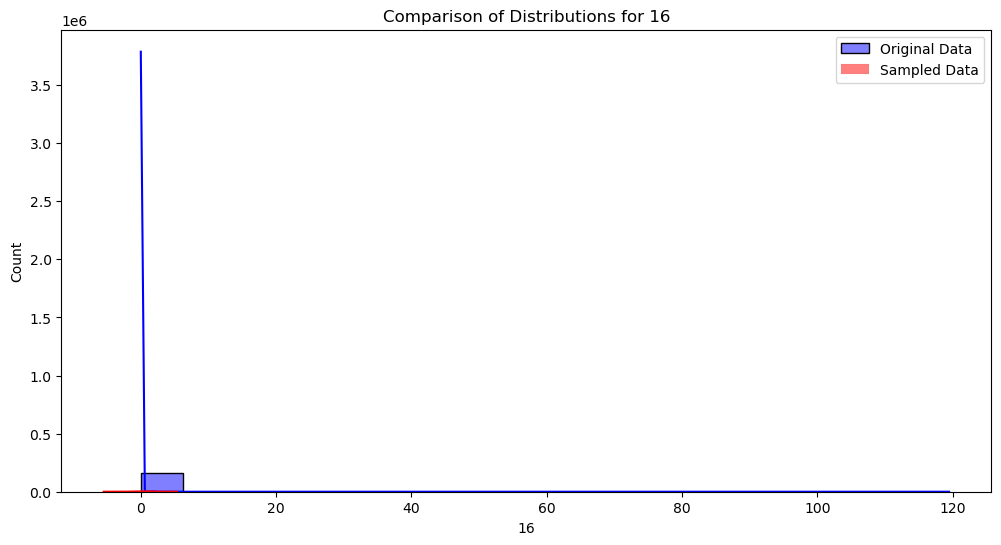

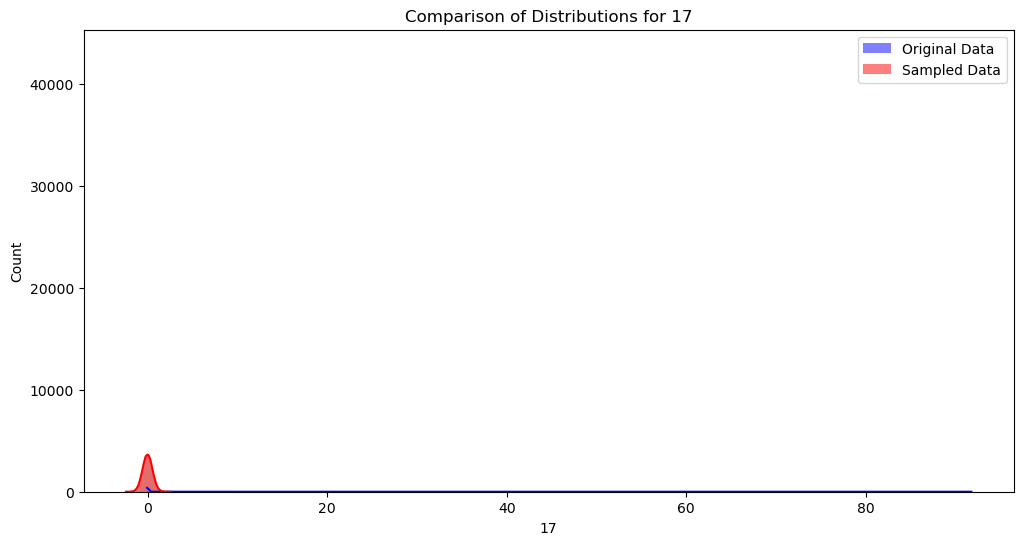

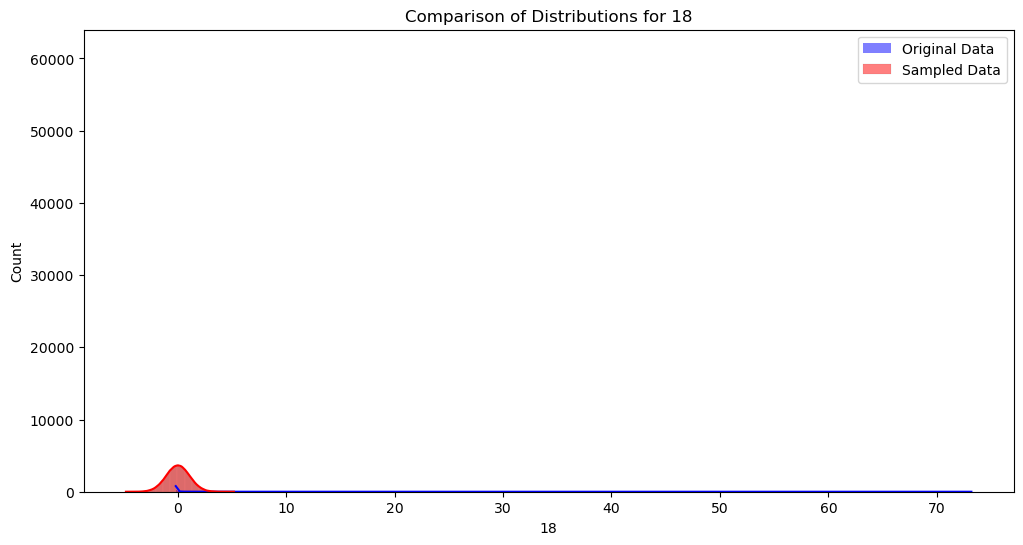

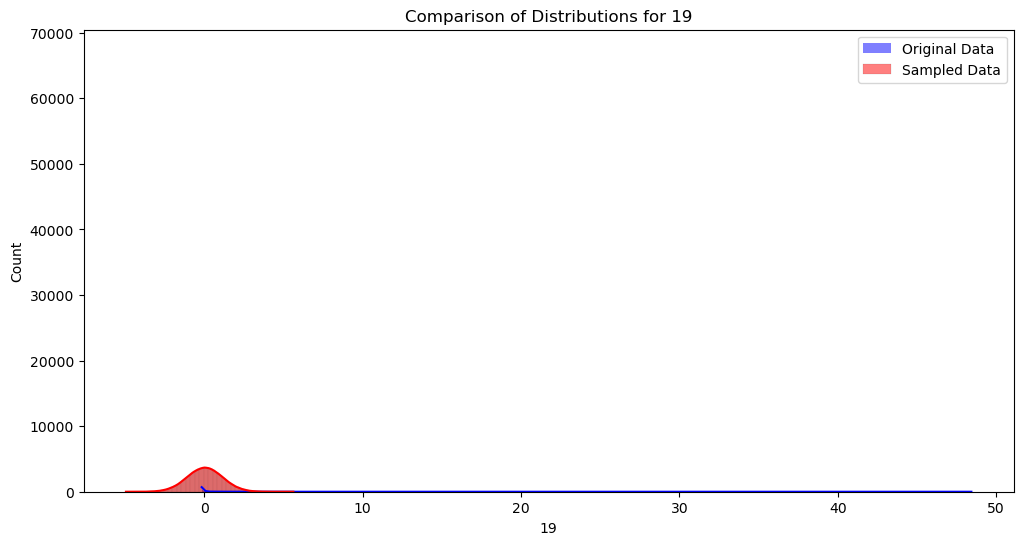

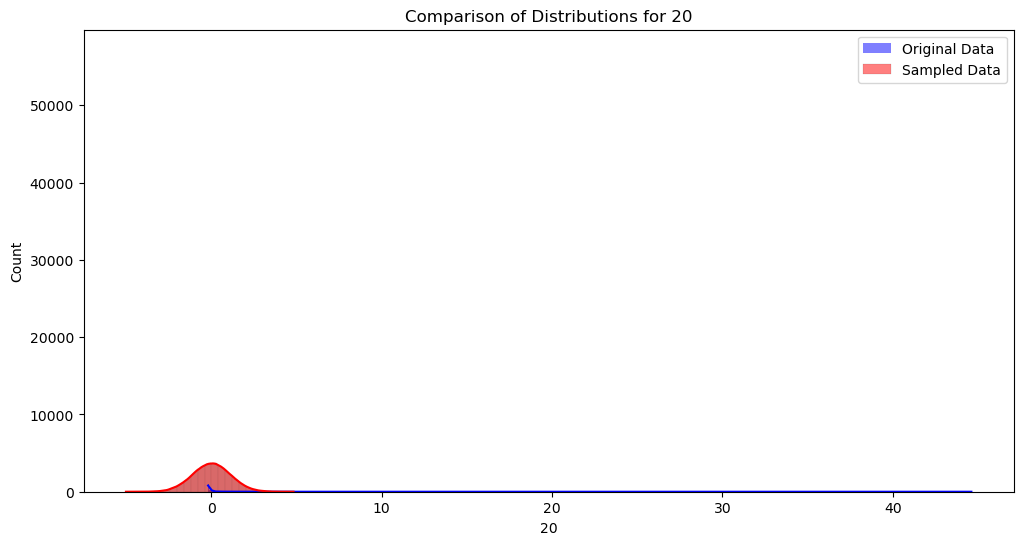

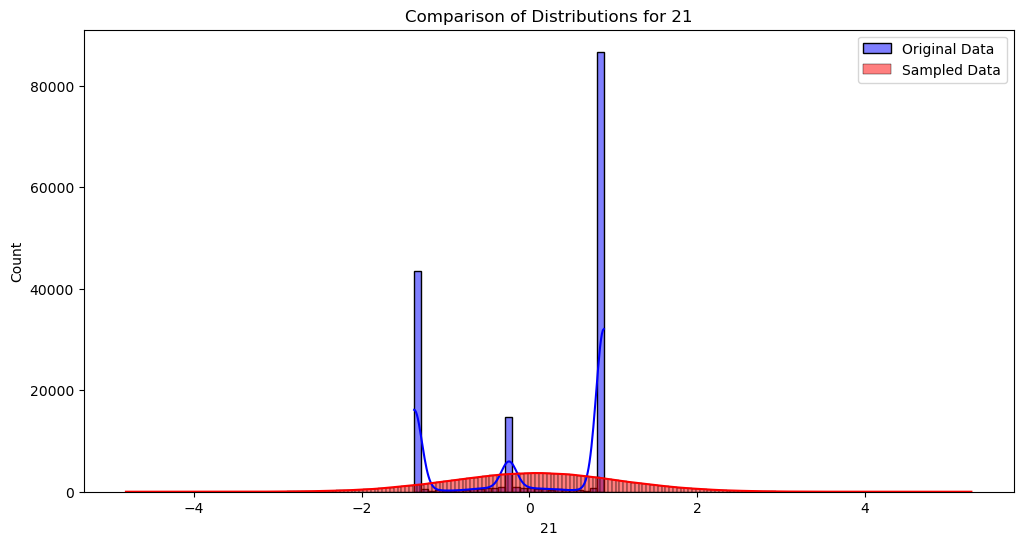

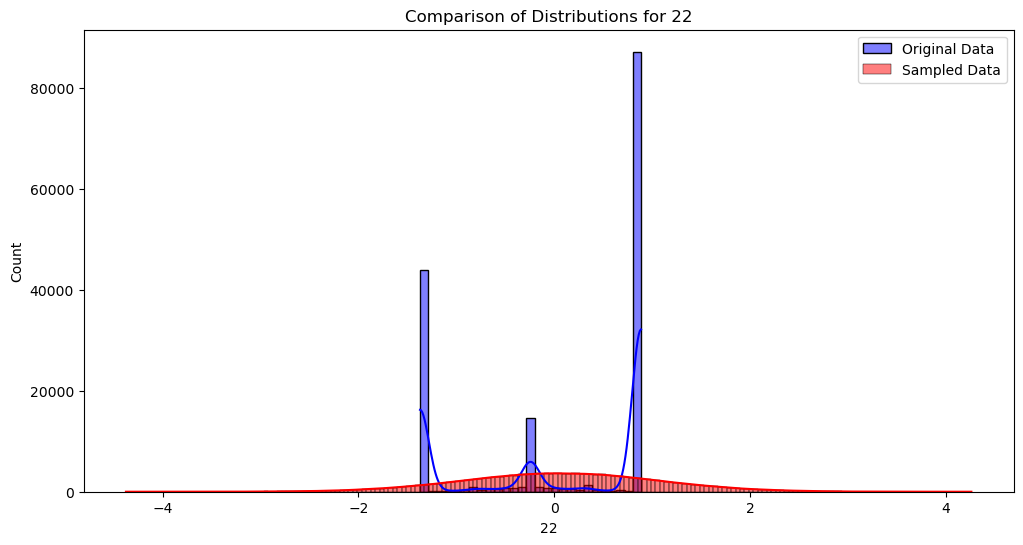

In [7]:
for column in unknown_df.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(unknown_df[column], kde=True, color='blue', label='Original Data')
    sns.histplot(generated_samples_df[column], kde=True, color='red', label='Sampled Data', alpha=0.5)
    plt.legend()
    plt.title(f'Comparison of Distributions for {column}')
    plt.show()

In [6]:
import numpy as np

In [7]:
new_data = pd.DataFrame()

for feature_name in unknown_df.columns:
    # Sample new data from the empirical distribution of the original data
    new_samples = np.random.choice(unknown_df[feature_name], size=200000, replace=True)
    
    # Store the new samples in the new dataframe
    new_data[feature_name] = new_samples

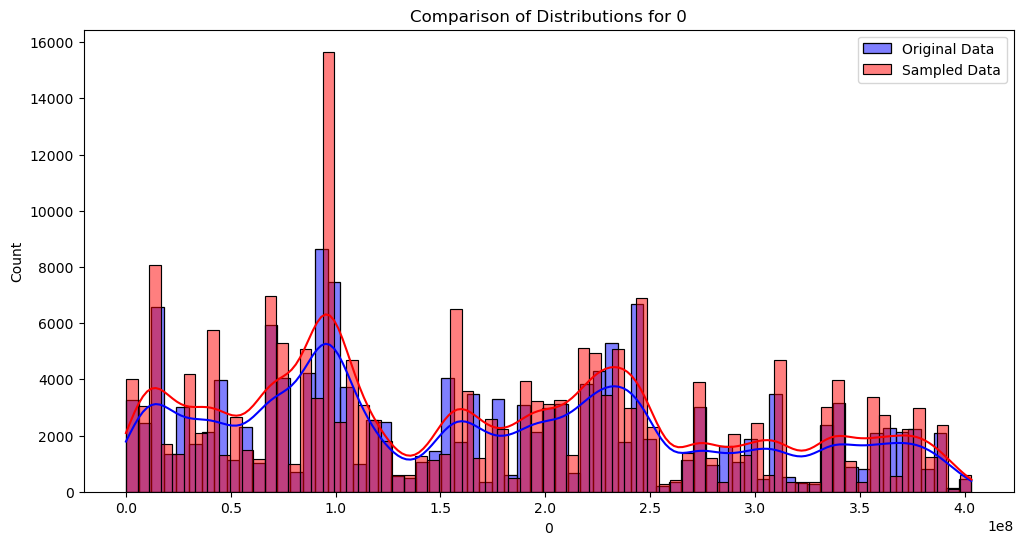

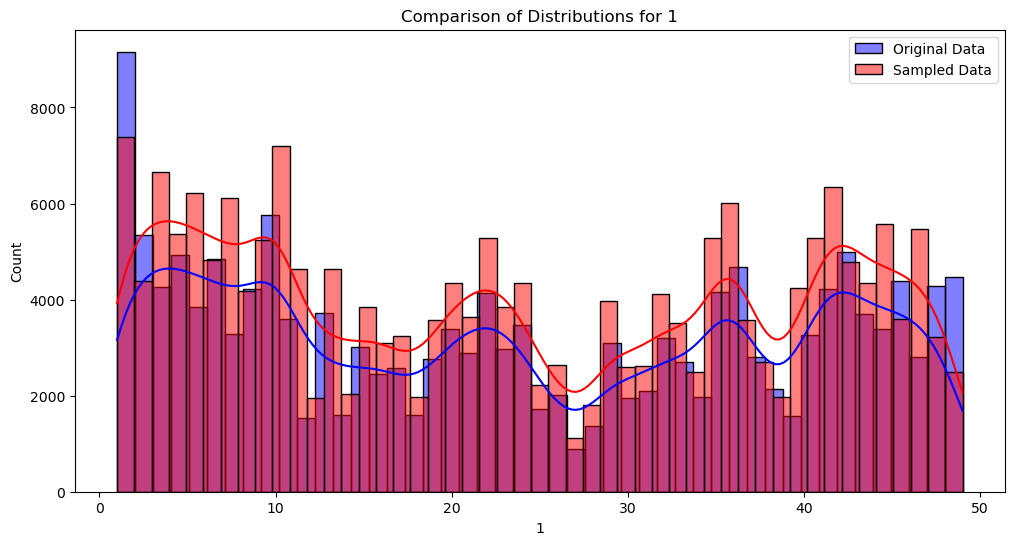

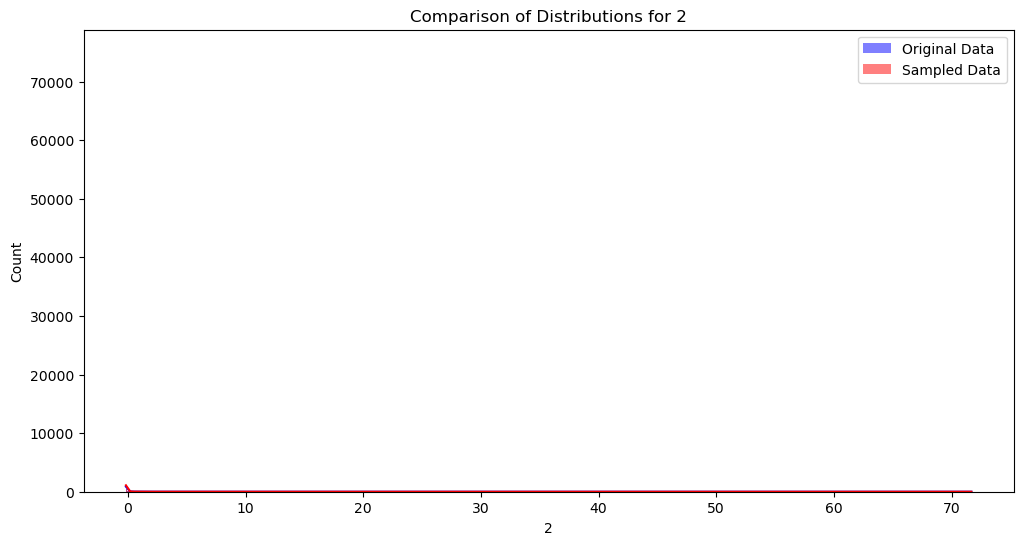

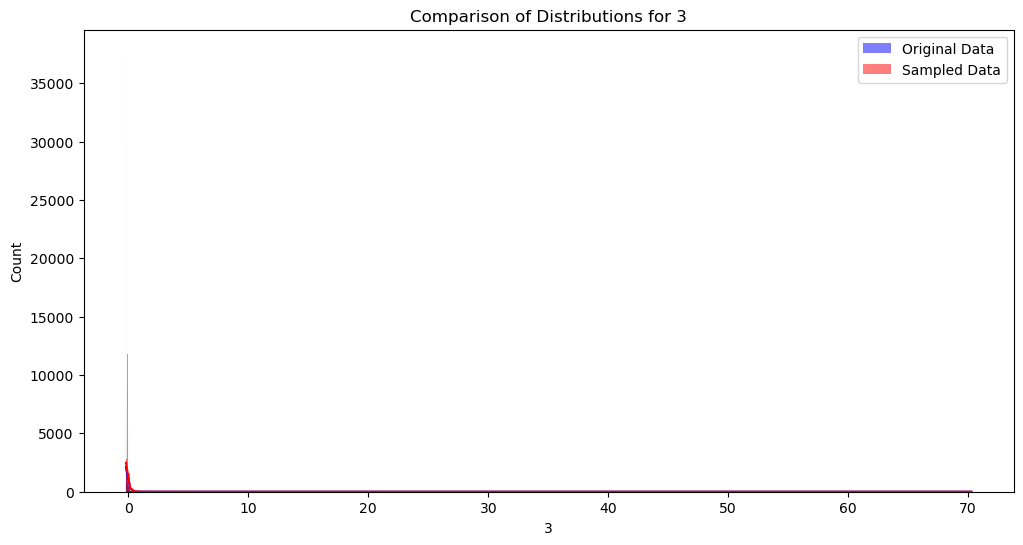

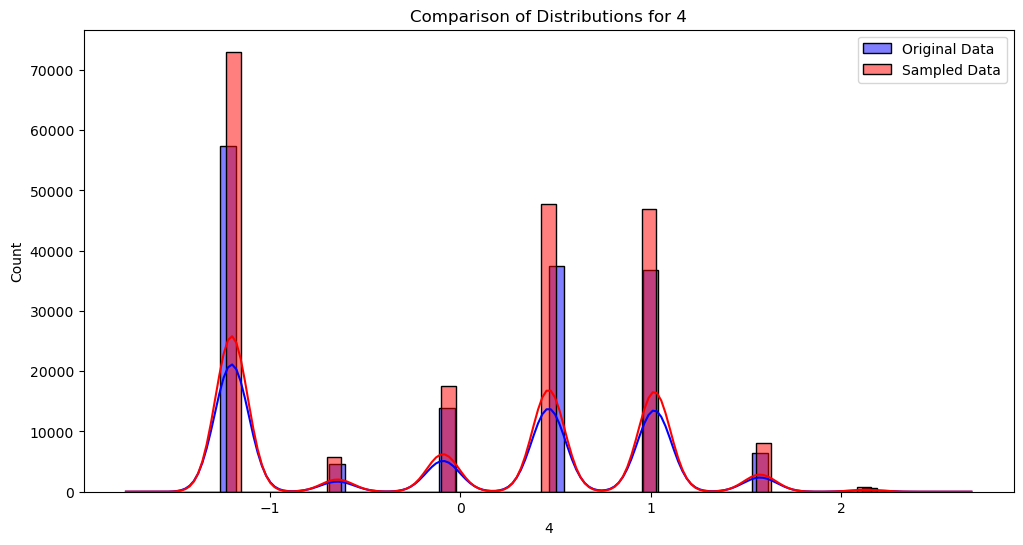

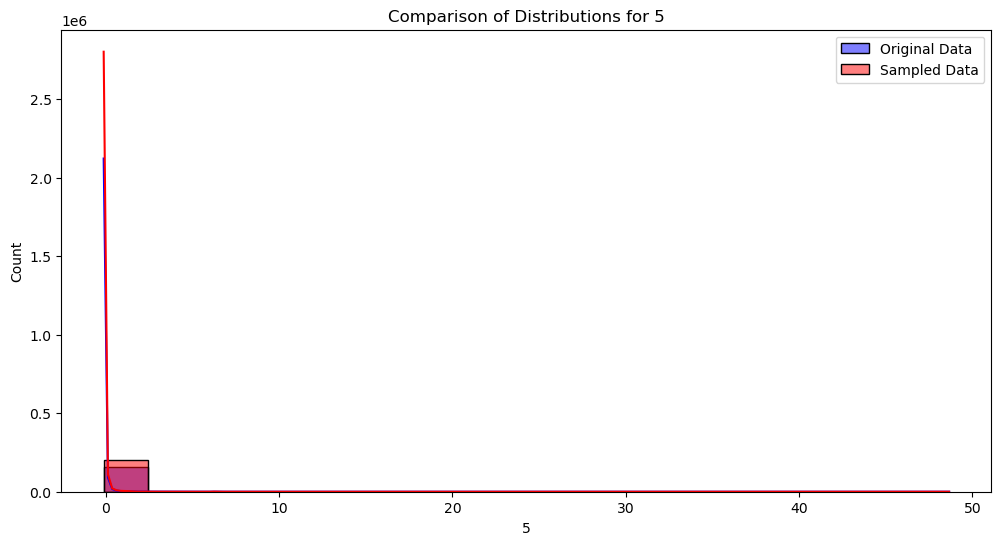

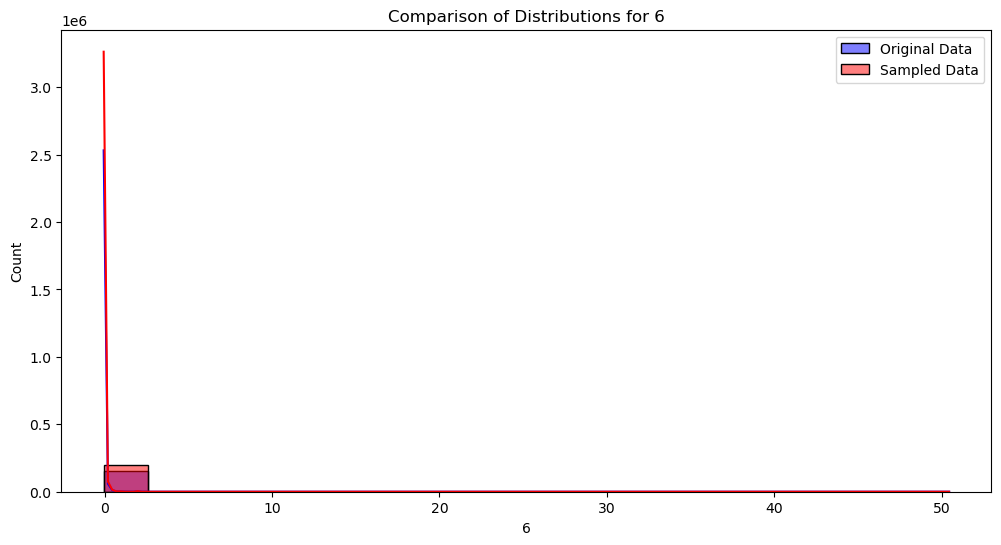

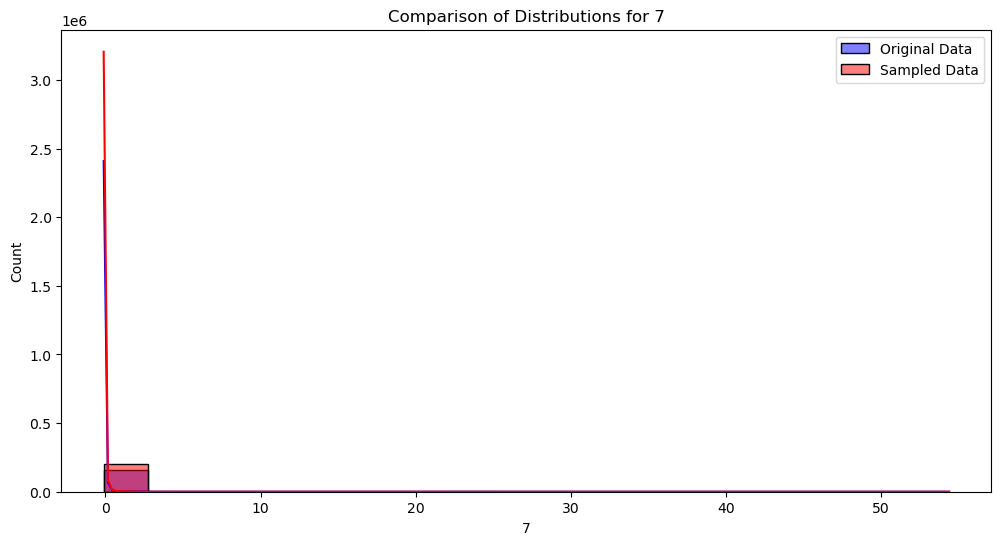

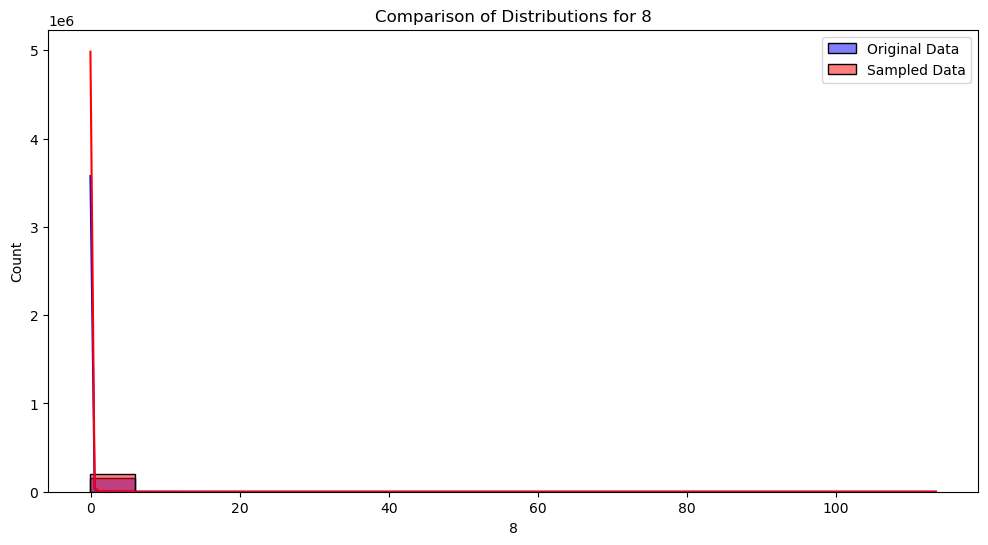

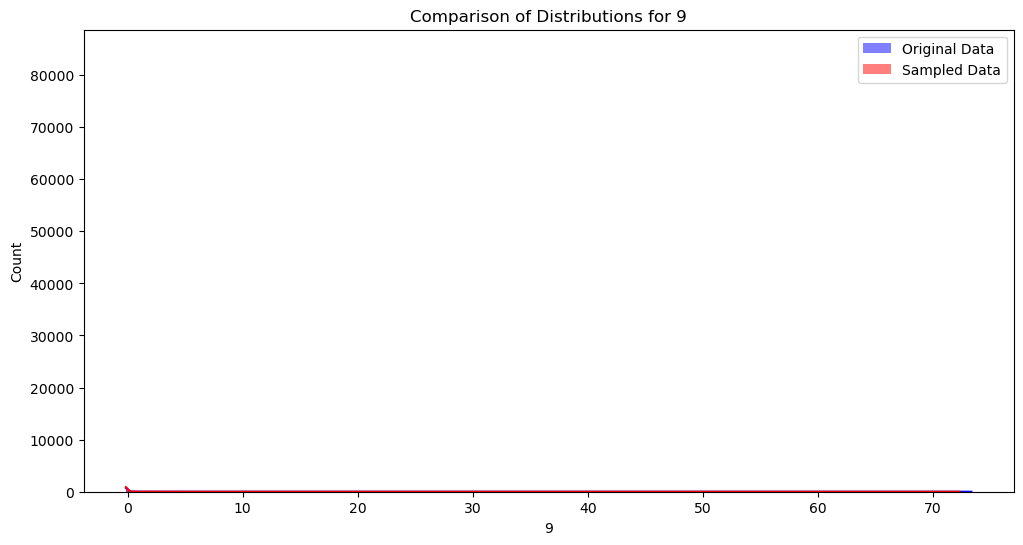

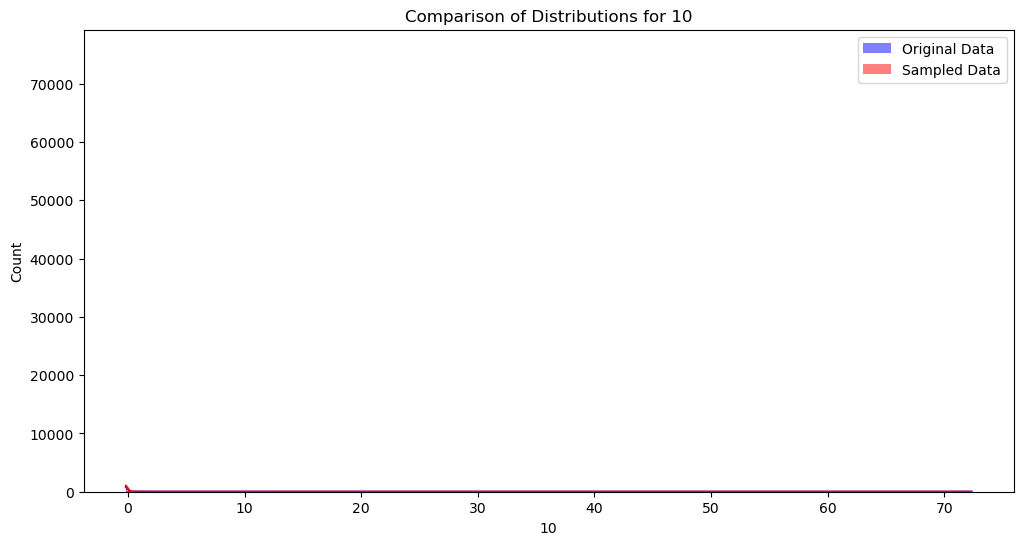

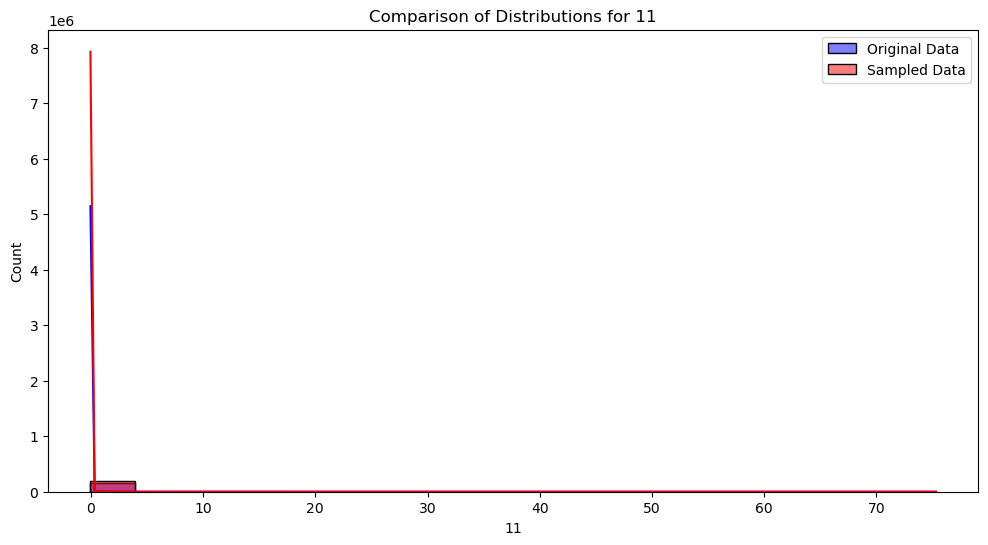

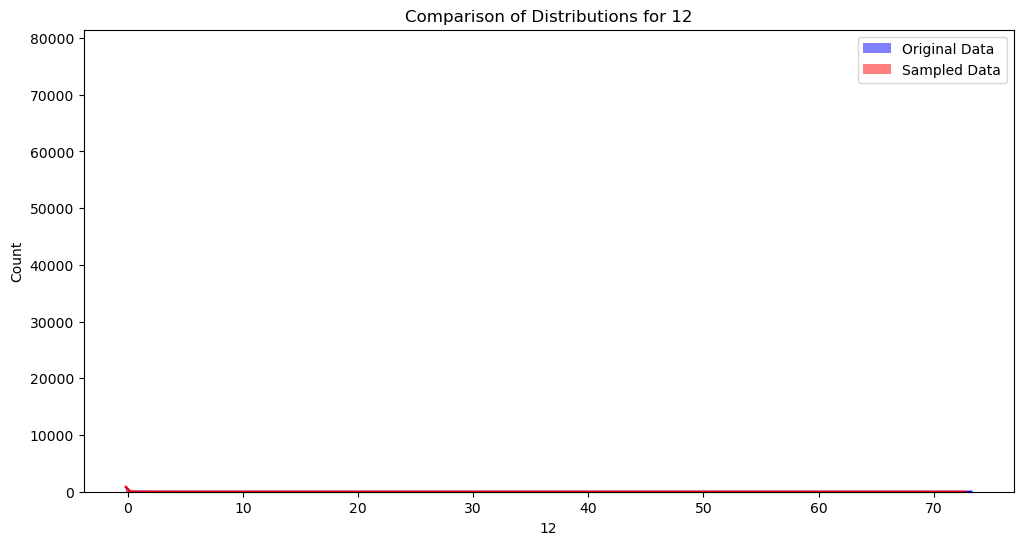

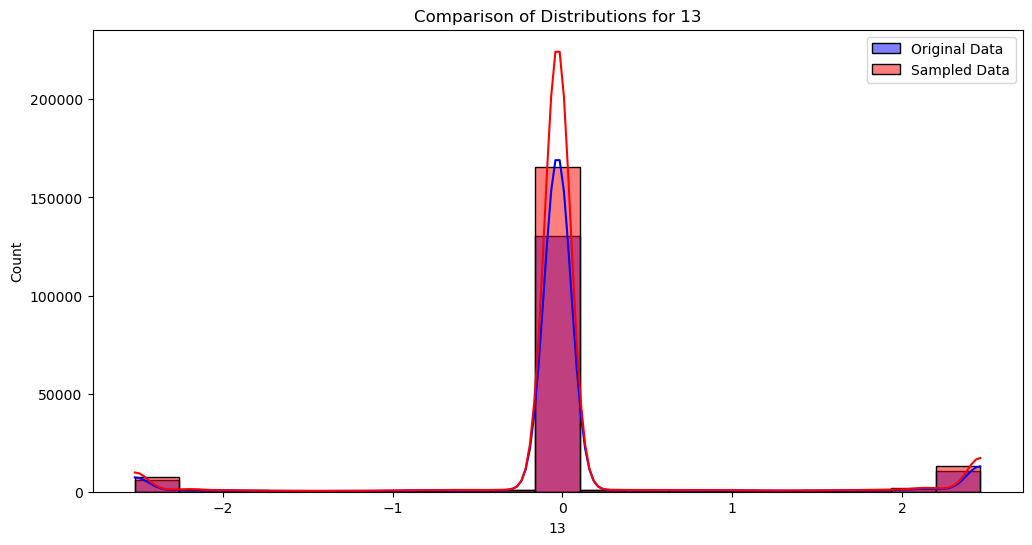

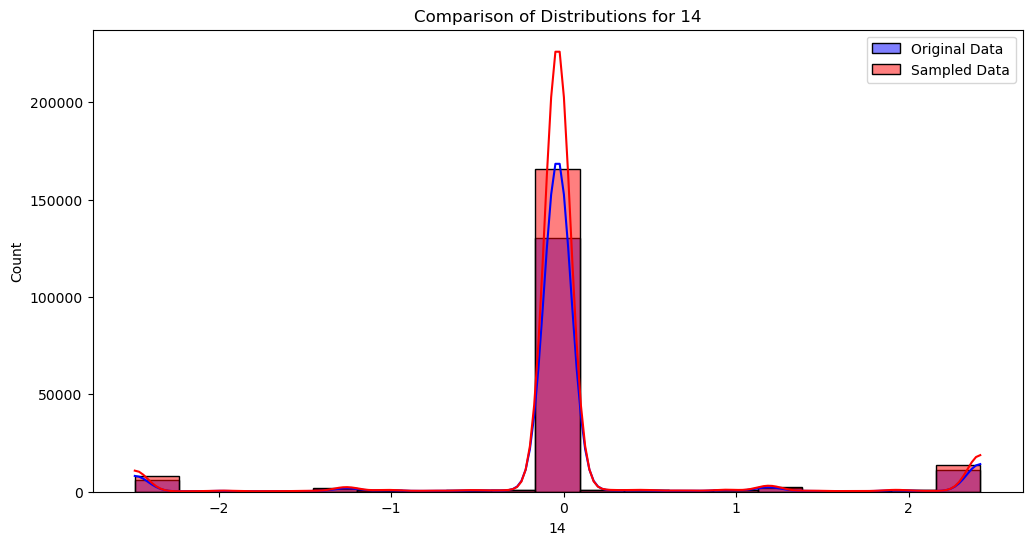

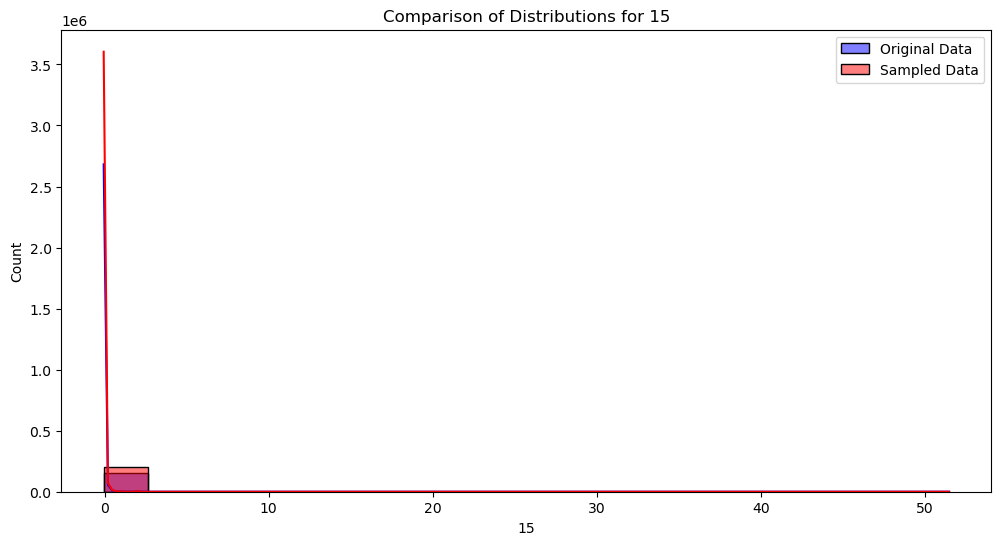

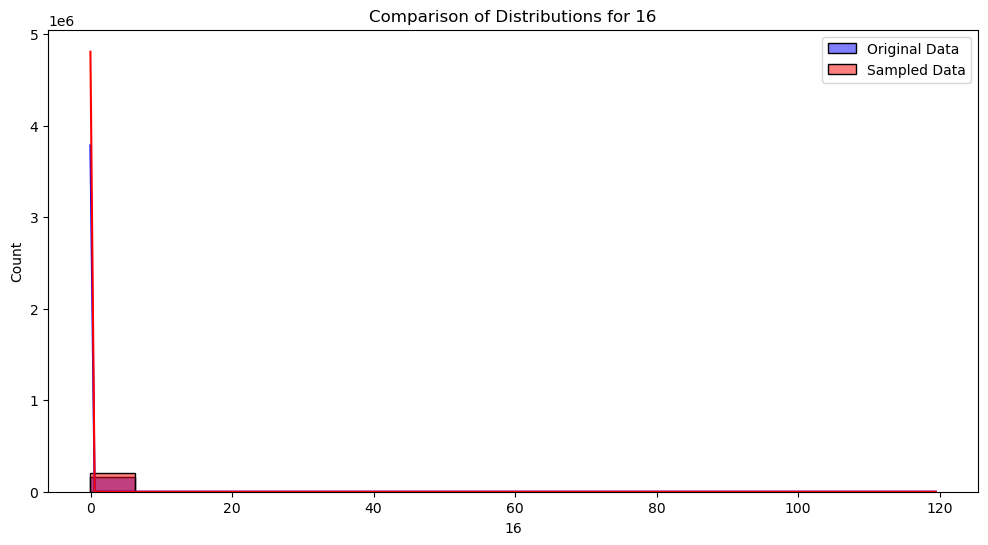

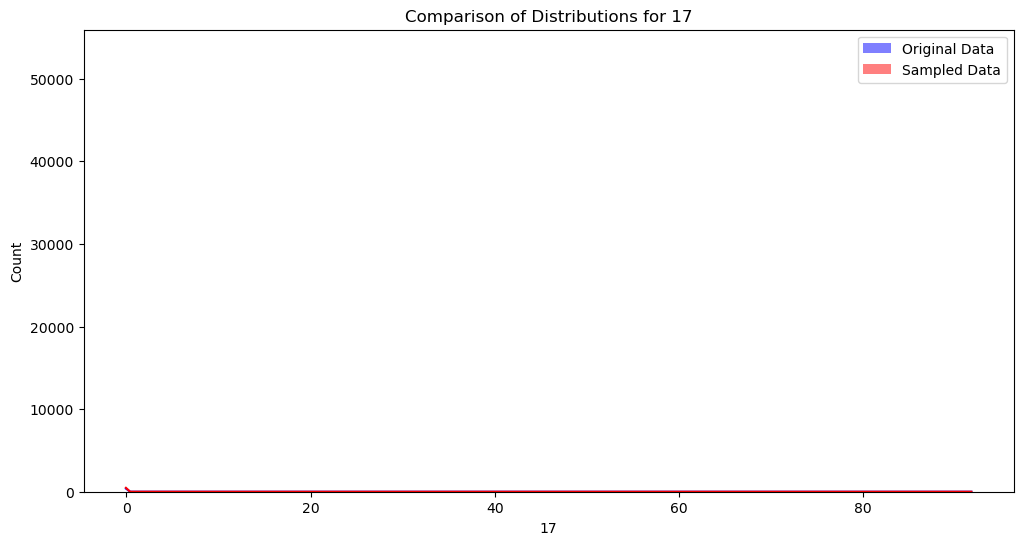

KeyboardInterrupt: 

In [10]:
for column in unknown_df.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(unknown_df[column], kde=True, color='blue', label='Original Data')
    sns.histplot(new_data[column], kde=True, color='red', label='Sampled Data', alpha=0.5)
    plt.legend()
    plt.title(f'Comparison of Distributions for {column}')
    plt.show()

In [15]:
new_data_2 = pd.DataFrame()

for feature_name in unknown_df.columns:
    # Sample new data from the empirical distribution of the original data
    new_samples = np.random.choice(known_df[feature_name], size=200000, replace=True)
    
    # Store the new samples in the new dataframe
    new_data_2[feature_name] = new_samples

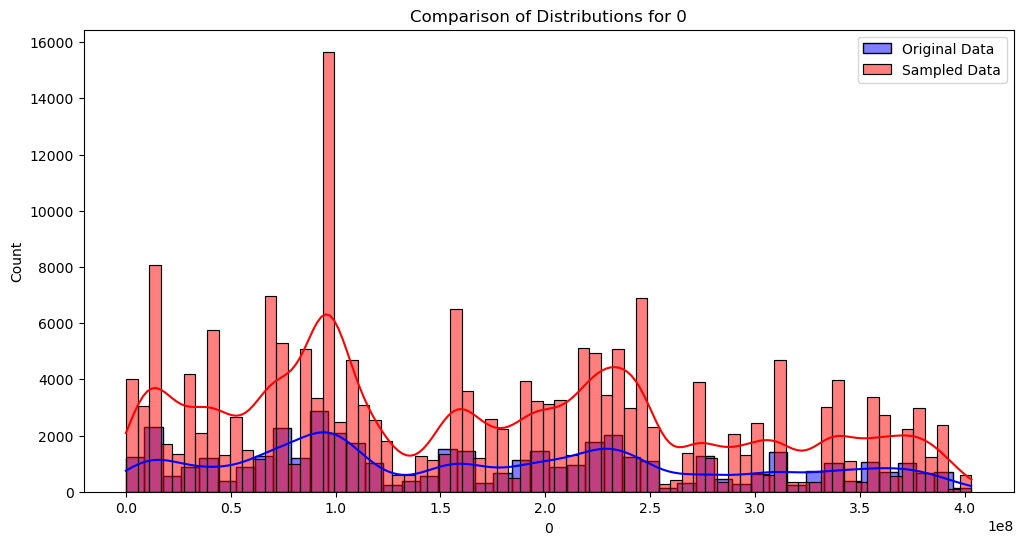

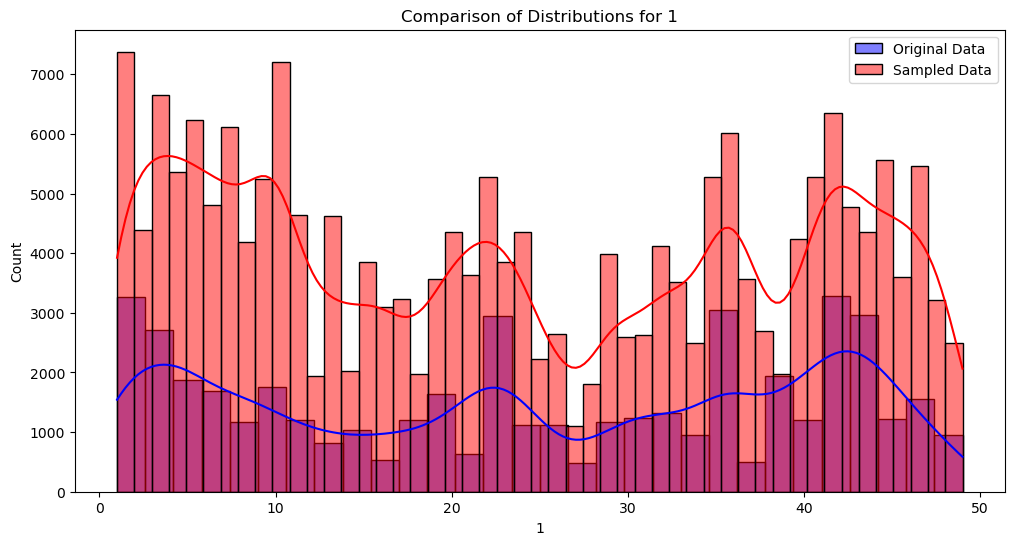

KeyboardInterrupt: 

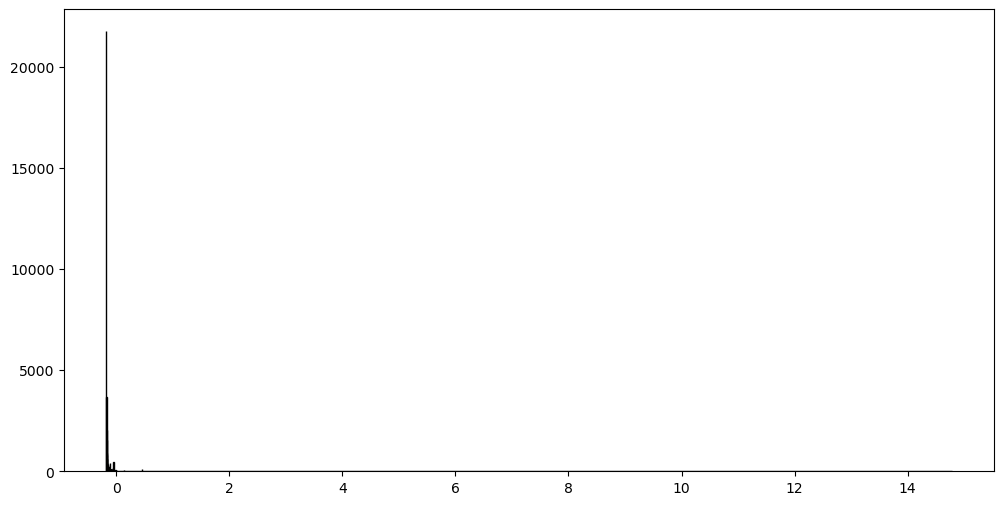

In [16]:
for column in unknown_df.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(known_df[column], kde=True, color='blue', label='Original Data')
    sns.histplot(new_data[column], kde=True, color='red', label='Sampled Data', alpha=0.5)
    plt.legend()
    plt.title(f'Comparison of Distributions for {column}')
    plt.show()